In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import normalize

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

import re
import os
import tqdm
import string

In [2]:
import re
import os
from io import StringIO
def clean_text(text):
    # remove numbers
    text_nonum = re.sub(r'\d+', '', str(text))
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    return text_no_doublespace


def remove_stops(text, stops):
    text = re.sub(r"AC\/\d{1,4}\/\d{1,4}", "", str(text))
    words = text.split()
    final = []
    for word in words:
        if word not in stops:
            final.append(word)
    final = " ".join(final)
    final = final.translate(str.maketrans("", "", string.punctuation))
    final = "".join([i for i in final if not i.isdigit()])
    while "  " in final:
        final = final.replace("  ", " ")
    return (final)

In [3]:
os.chdir('/Users/alisdghnia/Desktop/')

In [4]:
df1 = pd.read_excel('Full Dataset Cleaned with Excel Calculations.xlsx')

In [5]:
df1['Name'] = df1['Name'].apply(lambda x: x.replace('.pdf', ''))

In [6]:
df3 = pd.read_csv('Files Texts Dataframe.csv')

In [7]:
df3 = df3.rename(columns= {'Unnamed: 0':'File Name'})

In [8]:
new_corpus = []
for i in df3['Text Corpus']:
    i = clean_text(i)
    i = remove_stops(i, 'english')
    new_corpus.append(i)

df3['New Corpus'] = new_corpus

In [9]:
df3 = df3.drop(columns=['Text Corpus'])

In [10]:
df = pd.merge(df1, df3, left_on = 'Name', right_on= 'File Name')

In [11]:
df = df.drop(columns= ['Unnamed: 0', 'Unnamed: 19', 'Unnamed: 21','Unnamed: 23', 'Circulating Supply.1', 'Market Cap.1', 'Volume in Currency (24Hr).1', 'Circulating Supply',
            'Summary Section', 'Reference Section', 'Abstract Section'])

In [12]:
df

,Name,File Size (MB),Number of Pages,Word Count,Flesch Reading Ease,New Dale-Chall,Crypto Name,Price (Intraday),Market Cap,Volume in Currency (24Hr),Abstract Int,Summary Int,Reference Int,File Name,New Corpus
0,WeTrust1,1.342260,40,12504,43.02,7.33,WeTrust USD,2.483000e-03,228813.0,3.0,1,0,1,WeTrust1,wetrust whitepaper table of contents abstract ...
1,Libra4,0.293671,41,17474,54.42,6.51,Libera USD,4.740480e-01,0.0,131.0,1,0,1,Libra4,state machine replication in the libra blockch...
2,B2BX1,15.404950,42,1,121.22,19.48,X USD,6.870000e-04,0.0,9220.0,0,0,0,B2BX1,
3,Bytom1,0.374002,17,4536,34.15,7.79,Bytom USD,1.237500e-02,21831000.0,1088000.0,1,0,1,Bytom1,bytomv bytom an interoperation protocol for di...
4,Cindicator1,1.123809,37,15509,42.92,7.08,Cindicator USD,6.710000e-04,1342000.0,65.0,0,0,0,Cindicator1,hybrid intelligence for eective asset managem...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,CPChain1,1.195266,34,7203,40.28,6.96,CPChain USD,3.619000e-03,1363000.0,111473.0,0,0,0,CPChain1,cyberphysical chain cpchain whitepaper decentr...
552,Presearch2,5.291211,39,12904,41.70,7.16,Presearch USD,8.353100e-02,33127000.0,107073.0,1,0,0,Presearch2,whitepaper the communitypowered search engine ...
553,Electra1,0.624846,34,5508,37.13,9.05,Electra USD,4.600000e-07,0.0,48.0,1,1,0,Electra1,white paper release january table of contents ...
554,Blockmason1,3.355893,31,13640,49.04,7.00,Blockmason Credit Protocol USD,2.440000e-03,283474.0,9.0,0,0,0,Blockmason1,the credit protocol whitepaper v blockmason te...


In [13]:
filter_reading_score = (df['Flesch Reading Ease'] > 0) & (df['Flesch Reading Ease'] < 100)
filter_word_count = df['Word Count'] < 100000
filter_dale_chall = df['New Dale-Chall'] < 10.40

temp = df.loc[(filter_reading_score) & (filter_word_count) & (filter_dale_chall), ].copy()

In [14]:
temp.reset_index(inplace=True)

In [15]:
temp.drop(columns= ['index'], inplace=True)

In [16]:
temp

,Name,File Size (MB),Number of Pages,Word Count,Flesch Reading Ease,New Dale-Chall,Crypto Name,Price (Intraday),Market Cap,Volume in Currency (24Hr),Abstract Int,Summary Int,Reference Int,File Name,New Corpus
0,WeTrust1,1.342260,40,12504,43.02,7.33,WeTrust USD,2.483000e-03,228813.0,3.0,1,0,1,WeTrust1,wetrust whitepaper table of contents abstract ...
1,Libra4,0.293671,41,17474,54.42,6.51,Libera USD,4.740480e-01,0.0,131.0,1,0,1,Libra4,state machine replication in the libra blockch...
2,Bytom1,0.374002,17,4536,34.15,7.79,Bytom USD,1.237500e-02,21831000.0,1088000.0,1,0,1,Bytom1,bytomv bytom an interoperation protocol for di...
3,Cindicator1,1.123809,37,15509,42.92,7.08,Cindicator USD,6.710000e-04,1342000.0,65.0,0,0,0,Cindicator1,hybrid intelligence for eective asset managem...
4,iXledger1,0.604693,26,5658,46.27,7.86,Ultiledger USD,8.160000e-03,23144000.0,21700.0,0,1,1,iXledger1,an​ ​insurance​ ​marketplace​ ​based​ ​on​ ​bl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Status1,1.053982,35,6866,39.37,8.00,Status USD,3.180800e-02,110388000.0,4559000.0,0,1,0,Status1,the status network a strategy towards mass ado...
517,CPChain1,1.195266,34,7203,40.28,6.96,CPChain USD,3.619000e-03,1363000.0,111473.0,0,0,0,CPChain1,cyberphysical chain cpchain whitepaper decentr...
518,Presearch2,5.291211,39,12904,41.70,7.16,Presearch USD,8.353100e-02,33127000.0,107073.0,1,0,0,Presearch2,whitepaper the communitypowered search engine ...
519,Electra1,0.624846,34,5508,37.13,9.05,Electra USD,4.600000e-07,0.0,48.0,1,1,0,Electra1,white paper release january table of contents ...


In [17]:
tfidf = TfidfVectorizer(max_df=0.02, min_df=5, lowercase= True, stop_words='english')
features = tfidf.fit_transform(temp['New Corpus']).toarray()
words = tfidf.get_feature_names()
# labels = df.category_id
print(features.shape)

tfidf_df = pd.DataFrame(features, columns=words)

(521, 5446)


/Users/alisdghnia/.conda/envs/pythonProject/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
print(np.median(temp['Price (Intraday)']))
print(np.median(temp['Market Cap']))
print(np.median(temp['Volume in Currency (24Hr)']))

0.02704
2605000.0
107073.0


In [19]:
successful_price = []
value_price = []
# successcol = df[['Price (Intraday)', 'Market Cap', 'Volume in Currency (24Hr)']]
for i in temp['Price (Intraday)']:
    if i > np.median(temp['Price (Intraday)']):
        value_price = 1
    else:
        value_price = 0
    # print(value)
    successful_price.append(value_price)

# successful_price

In [20]:
successful_market = []
value_market = []
# successcol = df[['Price (Intraday)', 'Market Cap', 'Volume in Currency (24Hr)']]
for i in temp['Market Cap']:
    if i > np.median(temp['Market Cap']):
        value_market = 1
    else:
        value_market = 0
    # print(value)
    successful_market.append(value_market)

# successful_market

In [21]:
successful_volume = []
value_volume = []
# successcol = df[['Price (Intraday)', 'Market Cap', 'Volume in Currency (24Hr)']]
for i in temp['Volume in Currency (24Hr)']:
    if i > np.median(temp['Volume in Currency (24Hr)']):
        value_volume = 1
    else:
        value_volume = 0
    # print(value)
    successful_volume.append(value_volume)

# successful_volume

In [22]:
temp['Successful (Price)'] = successful_price
temp['Successful (Market Cap)'] = successful_market
temp['Successful (Volume)'] = successful_volume

In [23]:
new_col = ['Successful (Price)', 'Successful (Market Cap)', 'Successful (Volume)','Name', 'File Size (MB)', 'Number of Pages', 'Word Count', 'Flesch Reading Ease', 'New Dale-Chall', 'Crypto Name', 
            'Abstract Int', 'Summary Int', 'Reference Int', 'Price (Intraday)','Market Cap', 'Volume in Currency (24Hr)', 'File Name', 'New Corpus']
            
temp = temp[new_col]
temp = temp.reindex(columns= new_col)
temp

,Successful (Price),Successful (Market Cap),Successful (Volume),Name,File Size (MB),Number of Pages,Word Count,Flesch Reading Ease,New Dale-Chall,Crypto Name,Abstract Int,Summary Int,Reference Int,Price (Intraday),Market Cap,Volume in Currency (24Hr),File Name,New Corpus
0,0,0,0,WeTrust1,1.342260,40,12504,43.02,7.33,WeTrust USD,1,0,1,2.483000e-03,228813.0,3.0,WeTrust1,wetrust whitepaper table of contents abstract ...
1,1,0,0,Libra4,0.293671,41,17474,54.42,6.51,Libera USD,1,0,1,4.740480e-01,0.0,131.0,Libra4,state machine replication in the libra blockch...
2,0,1,1,Bytom1,0.374002,17,4536,34.15,7.79,Bytom USD,1,0,1,1.237500e-02,21831000.0,1088000.0,Bytom1,bytomv bytom an interoperation protocol for di...
3,0,0,0,Cindicator1,1.123809,37,15509,42.92,7.08,Cindicator USD,0,0,0,6.710000e-04,1342000.0,65.0,Cindicator1,hybrid intelligence for eective asset managem...
4,0,1,0,iXledger1,0.604693,26,5658,46.27,7.86,Ultiledger USD,0,1,1,8.160000e-03,23144000.0,21700.0,iXledger1,an​ ​insurance​ ​marketplace​ ​based​ ​on​ ​bl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,1,1,1,Status1,1.053982,35,6866,39.37,8.00,Status USD,0,1,0,3.180800e-02,110388000.0,4559000.0,Status1,the status network a strategy towards mass ado...
517,0,0,1,CPChain1,1.195266,34,7203,40.28,6.96,CPChain USD,0,0,0,3.619000e-03,1363000.0,111473.0,CPChain1,cyberphysical chain cpchain whitepaper decentr...
518,1,1,0,Presearch2,5.291211,39,12904,41.70,7.16,Presearch USD,1,0,0,8.353100e-02,33127000.0,107073.0,Presearch2,whitepaper the communitypowered search engine ...
519,0,0,0,Electra1,0.624846,34,5508,37.13,9.05,Electra USD,1,1,0,4.600000e-07,0.0,48.0,Electra1,white paper release january table of contents ...


In [24]:
df_all = pd.merge(temp, tfidf_df, left_index= True, right_index = True)
df_all.drop(columns= ['File Name'], inplace = True)
df_all.drop(temp[temp['Price (Intraday)'] > 500].index, inplace= True)
df_all.reset_index(inplace=True)
df_all.drop(columns = 'index',axis=1, inplace=True)

In [25]:
# df_all.drop(df[df['Word Count'] < 10].index, inplace= True)
# df_all.reset_index(inplace=True)
# df_all.drop(columns = 'index',axis=1, inplace=True)

In [26]:
df_all

,Successful (Price),Successful (Market Cap),Successful (Volume),Name,File Size (MB),Number of Pages,Word Count,Flesch Reading Ease,New Dale-Chall,Crypto Name,...,ﬂips,ﬂoating,ﬂood,ﬂooding,ﬂoor,ﬂowing,ﬂuctuate,ﬂuctuation,ﬂuid,ﬂy
0,0,0,0,WeTrust1,1.342260,40,12504,43.02,7.33,WeTrust USD,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,Libra4,0.293671,41,17474,54.42,6.51,Libera USD,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,Bytom1,0.374002,17,4536,34.15,7.79,Bytom USD,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,Cindicator1,1.123809,37,15509,42.92,7.08,Cindicator USD,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,0,iXledger1,0.604693,26,5658,46.27,7.86,Ultiledger USD,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,1,1,1,Status1,1.053982,35,6866,39.37,8.00,Status USD,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0,0,1,CPChain1,1.195266,34,7203,40.28,6.96,CPChain USD,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
508,1,1,0,Presearch2,5.291211,39,12904,41.70,7.16,Presearch USD,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
509,0,0,0,Electra1,0.624846,34,5508,37.13,9.05,Electra USD,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# filter_reading_score = (df_all['Flesch Reading Ease'] > 0) & (df_all['Flesch Reading Ease'] < 100)
# filter_word_count = df_all['Word Count'] < 100000

# temp = df_all.loc[(filter_reading_score) & (filter_word_count) , ].copy()
# # temp['Flesch Reading Ease'] = abs(temp['Flesch Reading Ease'])
# #== max(abs(df_all['Flesch Reading Ease'])),]

In [28]:
# temp2 = df_all.copy()
# df_all = temp

In [29]:
df_all.iloc[:, 1504]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
506    0.0
507    0.0
508    0.0
509    0.0
510    0.0
Name: eavesdropping, Length: 511, dtype: float64

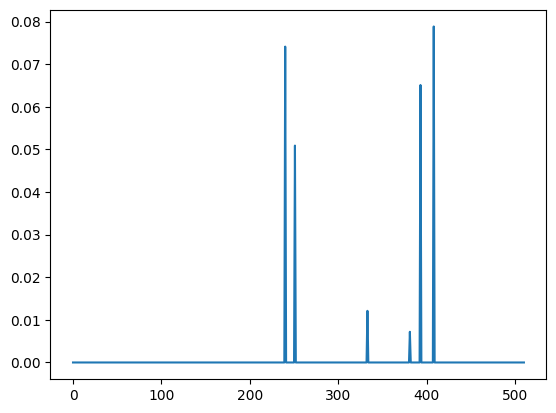

In [30]:
import matplotlib.pyplot as plt

plt.plot(df_all.iloc[:, 1504])

In [31]:
# temp[temp['New Dale-Chall'] > 10.40 ]

In [32]:
df_all.iloc[:, 4:13]

,File Size (MB),Number of Pages,Word Count,Flesch Reading Ease,New Dale-Chall,Crypto Name,Abstract Int,Summary Int,Reference Int
0,1.342260,40,12504,43.02,7.33,WeTrust USD,1,0,1
1,0.293671,41,17474,54.42,6.51,Libera USD,1,0,1
2,0.374002,17,4536,34.15,7.79,Bytom USD,1,0,1
3,1.123809,37,15509,42.92,7.08,Cindicator USD,0,0,0
4,0.604693,26,5658,46.27,7.86,Ultiledger USD,0,1,1
...,...,...,...,...,...,...,...,...,...
506,1.053982,35,6866,39.37,8.00,Status USD,0,1,0
507,1.195266,34,7203,40.28,6.96,CPChain USD,0,0,0
508,5.291211,39,12904,41.70,7.16,Presearch USD,1,0,0
509,0.624846,34,5508,37.13,9.05,Electra USD,1,1,0


In [33]:
meta_data = df_all.iloc[:, 4:13]
meta_data.drop(columns= 'Crypto Name', inplace=True)

In [34]:
meta_data

,File Size (MB),Number of Pages,Word Count,Flesch Reading Ease,New Dale-Chall,Abstract Int,Summary Int,Reference Int
0,1.342260,40,12504,43.02,7.33,1,0,1
1,0.293671,41,17474,54.42,6.51,1,0,1
2,0.374002,17,4536,34.15,7.79,1,0,1
3,1.123809,37,15509,42.92,7.08,0,0,0
4,0.604693,26,5658,46.27,7.86,0,1,1
...,...,...,...,...,...,...,...,...
506,1.053982,35,6866,39.37,8.00,0,1,0
507,1.195266,34,7203,40.28,6.96,0,0,0
508,5.291211,39,12904,41.70,7.16,1,0,0
509,0.624846,34,5508,37.13,9.05,1,1,0


In [35]:
df_all.iloc[:, 17:5480]

,aaa,abandon,abandoning,abandonment,abbreviated,abbreviation,abdelmalek,abi,ably,abn,...,ﬂips,ﬂoating,ﬂood,ﬂooding,ﬂoor,ﬂowing,ﬂuctuate,ﬂuctuation,ﬂuid,ﬂy
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.047846,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
508,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
509,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
tfidf_data = df_all.iloc[:, 17:1582]
tfidf_data

,aaa,abandon,abandoning,abandonment,abbreviated,abbreviation,abdelmalek,abi,ably,abn,...,enclave,enclaves,enclosed,encompass,encompassing,encounters,encouragement,encryp,encryptions,endeavour
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.047846,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
508,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
509,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
mix_data = pd.merge(meta_data, tfidf_data, left_index= True, right_index= True)
mix_data

,File Size (MB),Number of Pages,Word Count,Flesch Reading Ease,New Dale-Chall,Abstract Int,Summary Int,Reference Int,aaa,abandon,...,enclave,enclaves,enclosed,encompass,encompassing,encounters,encouragement,encryp,encryptions,endeavour
0,1.342260,40,12504,43.02,7.33,1,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.293671,41,17474,54.42,6.51,1,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.374002,17,4536,34.15,7.79,1,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.123809,37,15509,42.92,7.08,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.604693,26,5658,46.27,7.86,0,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,1.053982,35,6866,39.37,8.00,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,1.195266,34,7203,40.28,6.96,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
508,5.291211,39,12904,41.70,7.16,1,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
509,0.624846,34,5508,37.13,9.05,1,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Meta Prediction

In [38]:
X = meta_data
y = df_all['Successful (Price)']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### KNN Classifier

In [40]:
knn_clf = KNeighborsClassifier(n_neighbors= 2, algorithm= 'kd_tree', leaf_size=1000)
knn_clf.fit(X_train, y_train)
knn_predict = knn_clf.predict(X_test)
print(metrics.confusion_matrix(y_test, knn_predict))
print(metrics.classification_report(y_test, knn_predict))

[[43  9]
 [44  7]]
              precision    recall  f1-score   support

           0       0.49      0.83      0.62        52
           1       0.44      0.14      0.21        51

    accuracy                           0.49       103
   macro avg       0.47      0.48      0.41       103
weighted avg       0.47      0.49      0.42       103



### Decision Tree Classifier

In [41]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_predict = dt_clf.predict(X_test)
print(metrics.confusion_matrix(y_test, dt_predict))
print(metrics.classification_report(y_test, dt_predict))

[[29 23]
 [28 23]]
              precision    recall  f1-score   support

           0       0.51      0.56      0.53        52
           1       0.50      0.45      0.47        51

    accuracy                           0.50       103
   macro avg       0.50      0.50      0.50       103
weighted avg       0.50      0.50      0.50       103



### SGD Classifier

In [42]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)
sgd_predict = sgd_clf.predict(X_test)
print(metrics.confusion_matrix(y_test, sgd_predict))
print(metrics.classification_report(y_test, sgd_predict))

[[ 0 52]
 [ 0 51]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.50      1.00      0.66        51

    accuracy                           0.50       103
   macro avg       0.25      0.50      0.33       103
weighted avg       0.25      0.50      0.33       103



/Users/alisdghnia/.conda/envs/pythonProject/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alisdghnia/.conda/envs/pythonProject/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alisdghnia/.conda/envs/pythonProject/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### MLP Classifier

In [43]:
mlp_clf = MLPClassifier()
mlp_clf.fit(X_train, y_train)
mlp_predict = mlp_clf.predict(X_test)
print(metrics.confusion_matrix(y_test, mlp_predict))
print(metrics.classification_report(y_test, mlp_predict))

[[50  2]
 [51  0]]
              precision    recall  f1-score   support

           0       0.50      0.96      0.65        52
           1       0.00      0.00      0.00        51

    accuracy                           0.49       103
   macro avg       0.25      0.48      0.33       103
weighted avg       0.25      0.49      0.33       103



### Logistic Regression

In [44]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
logreg_predict = log_reg.predict(X_test)
print(metrics.confusion_matrix(y_test, logreg_predict))
print(metrics.classification_report(y_test, logreg_predict))

[[41 11]
 [27 24]]
              precision    recall  f1-score   support

           0       0.60      0.79      0.68        52
           1       0.69      0.47      0.56        51

    accuracy                           0.63       103
   macro avg       0.64      0.63      0.62       103
weighted avg       0.64      0.63      0.62       103



/Users/alisdghnia/.conda/envs/pythonProject/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)
nb_predict = nb_clf.predict(X_test)
print(metrics.confusion_matrix(y_test, nb_predict))
print(metrics.classification_report(y_test, nb_predict))

[[31 21]
 [30 21]]
              precision    recall  f1-score   support

           0       0.51      0.60      0.55        52
           1       0.50      0.41      0.45        51

    accuracy                           0.50       103
   macro avg       0.50      0.50      0.50       103
weighted avg       0.50      0.50      0.50       103



In [46]:
svm_clf = SVC(kernel= 'rbf', gamma= 'scale')
svm_clf.fit(X_train, y_train)
svm_predict = svm_clf.predict(X_test)
print(metrics.confusion_matrix(y_test, svm_predict))
print(metrics.classification_report(y_test, svm_predict))

[[44  8]
 [35 16]]
              precision    recall  f1-score   support

           0       0.56      0.85      0.67        52
           1       0.67      0.31      0.43        51

    accuracy                           0.58       103
   macro avg       0.61      0.58      0.55       103
weighted avg       0.61      0.58      0.55       103



# TFIDF Prediction

In [47]:
X = tfidf_data
y = df_all['Successful (Price)']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

### KNN Classifier

In [49]:
knn_clf = KNeighborsClassifier(n_neighbors= 100, algorithm= 'kd_tree')
knn_clf.fit(X_train, y_train)
knn_predict = knn_clf.predict(X_test)
print(metrics.confusion_matrix(y_test, knn_predict))
print(metrics.classification_report(y_test, knn_predict))

[[ 0 27]
 [ 0 25]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.48      1.00      0.65        25

    accuracy                           0.48        52
   macro avg       0.24      0.50      0.32        52
weighted avg       0.23      0.48      0.31        52



/Users/alisdghnia/.conda/envs/pythonProject/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alisdghnia/.conda/envs/pythonProject/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alisdghnia/.conda/envs/pythonProject/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### Decision Tree Classifier

In [50]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_predict = dt_clf.predict(X_test)
print(metrics.confusion_matrix(y_test, dt_predict))
print(metrics.classification_report(y_test, dt_predict))

[[18  9]
 [11 14]]
              precision    recall  f1-score   support

           0       0.62      0.67      0.64        27
           1       0.61      0.56      0.58        25

    accuracy                           0.62        52
   macro avg       0.61      0.61      0.61        52
weighted avg       0.61      0.62      0.61        52



### SGD Classifier

In [51]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)
sgd_predict = sgd_clf.predict(X_test)
print(metrics.confusion_matrix(y_test, sgd_predict))
print(metrics.classification_report(y_test, sgd_predict))

[[17 10]
 [ 5 20]]
              precision    recall  f1-score   support

           0       0.77      0.63      0.69        27
           1       0.67      0.80      0.73        25

    accuracy                           0.71        52
   macro avg       0.72      0.71      0.71        52
weighted avg       0.72      0.71      0.71        52



### MLP Classifier

In [52]:
from sklearn.metrics import accuracy_score


mlp_clf = MLPClassifier(activation= 'relu', solver= 'adam', max_iter= 1000, hidden_layer_sizes=(1000, ))
mlp_clf.fit(X_train, y_train)
mlp_predict = mlp_clf.predict(X_test)
print(metrics.confusion_matrix(y_test, mlp_predict))
print(metrics.classification_report(y_test, mlp_predict))
print(accuracy_score(y_test, mlp_predict))

[[19  8]
 [ 9 16]]
              precision    recall  f1-score   support

           0       0.68      0.70      0.69        27
           1       0.67      0.64      0.65        25

    accuracy                           0.67        52
   macro avg       0.67      0.67      0.67        52
weighted avg       0.67      0.67      0.67        52

0.6730769230769231


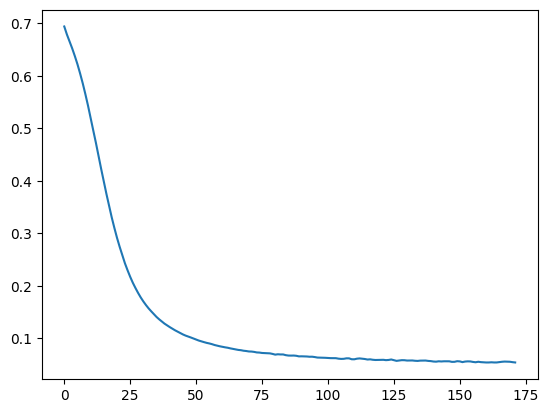

In [53]:
plt.plot(mlp_clf.loss_curve_)

### Logistic Regression

In [54]:
log_reg = LogisticRegression(penalty= 'l2', solver= 'lbfgs')
log_reg.fit(X_train, y_train)
logreg_predict = log_reg.predict(X_test)
print(metrics.confusion_matrix(y_test, logreg_predict))
print(metrics.classification_report(y_test, logreg_predict))

[[24  3]
 [10 15]]
              precision    recall  f1-score   support

           0       0.71      0.89      0.79        27
           1       0.83      0.60      0.70        25

    accuracy                           0.75        52
   macro avg       0.77      0.74      0.74        52
weighted avg       0.77      0.75      0.74        52



### NB Classifier

In [55]:
nb_clf = MultinomialNB(alpha=0)
nb_clf.fit(X_train, y_train)
nb_predict = nb_clf.predict(X_test)
print(metrics.confusion_matrix(y_test, nb_predict))
print(metrics.classification_report(y_test, nb_predict))

[[19  8]
 [ 5 20]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.75        27
           1       0.71      0.80      0.75        25

    accuracy                           0.75        52
   macro avg       0.75      0.75      0.75        52
weighted avg       0.75      0.75      0.75        52



/Users/alisdghnia/.conda/envs/pythonProject/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


# All Data Prediction

In [56]:
X = mix_data
y = df_all['Successful (Price)']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

### KNN Classifier

In [59]:
knn_clf = KNeighborsClassifier(n_neighbors= 160)
knn_clf.fit(X_train, y_train)
knn_predict = knn_clf.predict(X_test)
print(metrics.confusion_matrix(y_test, knn_predict))
print(metrics.classification_report(y_test, knn_predict))

[[35  5]
 [26 11]]
              precision    recall  f1-score   support

           0       0.57      0.88      0.69        40
           1       0.69      0.30      0.42        37

    accuracy                           0.60        77
   macro avg       0.63      0.59      0.55        77
weighted avg       0.63      0.60      0.56        77



### Decision Tree Classifier

In [60]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_predict = dt_clf.predict(X_test)
print(metrics.confusion_matrix(y_test, dt_predict))
print(metrics.classification_report(y_test, dt_predict))

[[26 14]
 [22 15]]
              precision    recall  f1-score   support

           0       0.54      0.65      0.59        40
           1       0.52      0.41      0.45        37

    accuracy                           0.53        77
   macro avg       0.53      0.53      0.52        77
weighted avg       0.53      0.53      0.53        77



### SGD Classifier

In [61]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)
sgd_predict = sgd_clf.predict(X_test)
print(metrics.confusion_matrix(y_test, sgd_predict))
print(metrics.classification_report(y_test, sgd_predict))

[[40  0]
 [37  0]]
              precision    recall  f1-score   support

           0       0.52      1.00      0.68        40
           1       0.00      0.00      0.00        37

    accuracy                           0.52        77
   macro avg       0.26      0.50      0.34        77
weighted avg       0.27      0.52      0.36        77



/Users/alisdghnia/.conda/envs/pythonProject/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alisdghnia/.conda/envs/pythonProject/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alisdghnia/.conda/envs/pythonProject/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### MLP Classifier

In [63]:
mlp_clf = MLPClassifier(activation= 'relu', solver= 'adam', max_iter= 1000, hidden_layer_sizes=(1000, ))
mlp_clf.fit(X_train, y_train)
mlp_predict = mlp_clf.predict(X_test)
print(metrics.confusion_matrix(y_test, mlp_predict))
print(metrics.classification_report(y_test, mlp_predict))

[[ 0 40]
 [ 0 37]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.48      1.00      0.65        37

    accuracy                           0.48        77
   macro avg       0.24      0.50      0.32        77
weighted avg       0.23      0.48      0.31        77



/Users/alisdghnia/.conda/envs/pythonProject/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alisdghnia/.conda/envs/pythonProject/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alisdghnia/.conda/envs/pythonProject/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### Logistic Regression

In [64]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
logreg_predict = log_reg.predict(X_test)
print(metrics.confusion_matrix(y_test, logreg_predict))
print(metrics.classification_report(y_test, logreg_predict))

[[29 11]
 [16 21]]
              precision    recall  f1-score   support

           0       0.64      0.72      0.68        40
           1       0.66      0.57      0.61        37

    accuracy                           0.65        77
   macro avg       0.65      0.65      0.65        77
weighted avg       0.65      0.65      0.65        77

